# Part-1: Data Exploration and Pre-processing.

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

1. Load dataset.

In [25]:
cd E:\Data Sci\Machince_Langauage\Ass

E:\Data Sci\Machince_Langauage\Ass


In [26]:
data = pd.read_csv("Ass-11.csv")

In [27]:
data.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,1,1,1,0,1,0,0,0,1,0,0,0,no
1,1,0,1,0,1,0,0,0,1,0,0,0,no
2,1,0,1,0,1,0,0,0,1,0,0,0,no
3,1,0,1,0,1,0,0,0,1,0,0,0,no
4,1,0,0,0,0,0,1,1,0,0,0,0,no


2. Check null values.

In [28]:
data.isnull().sum()

Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
UnderRisk                          0
dtype: int64

3. Print information about dataset.

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           889 non-null    int64 
 1   Chain_smoker                     889 non-null    int64 
 2   Consumes_other_tobacco_products  889 non-null    int64 
 3   HighBP                           889 non-null    int64 
 4   Obese                            889 non-null    int64 
 5   Diabetes                         889 non-null    int64 
 6   Metabolic_syndrome               889 non-null    int64 
 7   Use_of_stimulant_drugs           889 non-null    int64 
 8   Family_history                   889 non-null    int64 
 9   History_of_preeclampsia          889 non-null    int64 
 10  CABG_history                     889 non-null    int64 
 11  Respiratory_illness              889 non-null    int64 
 12  UnderRisk                        889

4. Describe dataset in statistic form.

In [30]:
data.describe()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
count,889.000000,889.000000,889.00000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,1.258718,0.120360,0.83802,0.086614,0.919010,0.055118,0.042745,0.082115,0.925759,0.017998,0.021372,0.032621
std,0.500557,0.325565,0.36864,0.281427,0.272973,0.228339,0.202395,0.274694,0.262310,0.133018,0.144704,0.177742
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


5. Drop under risk column.

In [31]:
data1 = data.drop(['UnderRisk'] , axis = 1 )

In [32]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Gender                           889 non-null    int64
 1   Chain_smoker                     889 non-null    int64
 2   Consumes_other_tobacco_products  889 non-null    int64
 3   HighBP                           889 non-null    int64
 4   Obese                            889 non-null    int64
 5   Diabetes                         889 non-null    int64
 6   Metabolic_syndrome               889 non-null    int64
 7   Use_of_stimulant_drugs           889 non-null    int64
 8   Family_history                   889 non-null    int64
 9   History_of_preeclampsia          889 non-null    int64
 10  CABG_history                     889 non-null    int64
 11  Respiratory_illness              889 non-null    int64
dtypes: int64(12)
memory usage: 83.5 KB


# Part-2: Working with Models

1. Apply Kmean clustering on dataset.

In [33]:
km = KMeans(n_clusters=2,)
km.fit(data1)

KMeans(n_clusters=2)

Check the wcss score if n_cluster = 2.

In [14]:
wcss = km.inertia_
wcss

645.4620853080589

3. Try different n and find wcss score.

In [34]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
#create empty list
wcss = []
#select k value from 1 to 10
for i in range(1, 11):
    km = KMeans(n_clusters = i, random_state = 42)
    km.fit(data1)
    # inertia method returns wcss for that model
    wcss.append(km.inertia_)

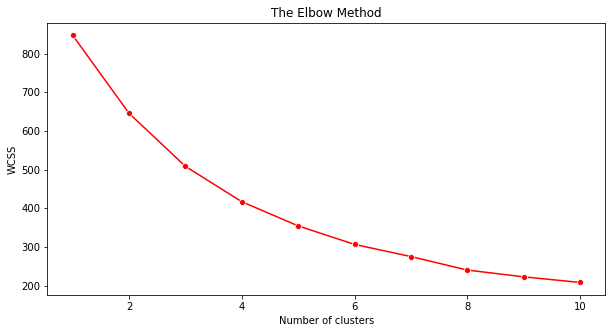

In [36]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

So ellbow=6 

Try again kmeans with best no. cluster according wo wcss score.

In [37]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data1)

In [38]:
y_kmeans

array([0, 2, 2, 2, 3, 1, 4, 1, 2, 4, 2, 1, 5, 2, 2, 2, 1, 2, 0, 2, 2, 2,
       0, 1, 2, 0, 2, 4, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 2, 2, 2, 1, 5, 1,
       2, 1, 1, 2, 1, 3, 2, 5, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 0, 1, 2, 5, 2, 2, 2, 0, 5, 2, 0, 0, 5, 1, 4, 2, 1, 2, 0,
       5, 2, 0, 1, 0, 2, 2, 2, 5, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2,
       0, 2, 5, 2, 2, 1, 1, 2, 1, 4, 3, 5, 2, 1, 4, 2, 2, 5, 0, 1, 5, 5,
       5, 2, 2, 0, 1, 1, 1, 2, 5, 2, 2, 1, 1, 2, 2, 0, 3, 2, 0, 2, 2, 1,
       2, 2, 5, 2, 2, 2, 2, 0, 4, 0, 5, 1, 1, 1, 4, 5, 2, 5, 2, 2, 2, 2,
       2, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 2, 2, 5,
       5, 2, 1, 1, 0, 1, 1, 0, 0, 2, 1, 4, 2, 1, 2, 2, 5, 2, 1, 2, 2, 2,
       0, 2, 2, 3, 2, 2, 2, 2, 5, 5, 2, 2, 1, 2, 2, 0, 3, 5, 1, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 2, 4, 2, 2, 0, 2, 1, 0, 2, 1, 2, 2, 2, 2,
       2, 0, 1, 2, 0, 1, 1, 2, 1, 5, 2, 1, 2, 1, 2, 1, 2, 2, 0, 2, 4, 2,
       2, 2, 5, 1, 1, 2, 2, 2, 0, 1, 2, 5, 1, 1, 2,

2. Print cluster centers.

In [39]:
km.cluster_centers_

array([[ 9.54802260e-01,  1.52655666e-16,  1.00000000e+00,
         9.71445147e-17,  1.00000000e+00,  6.93889390e-17,
        -4.16333634e-17, -4.16333634e-17,  9.83050847e-01,
         1.97740113e-02,  1.69491525e-02,  3.38983051e-02],
       [ 2.00000000e+00,  3.24074074e-02,  9.58333333e-01,
         4.16666667e-02,  1.00000000e+00,  6.24500451e-17,
        -2.77555756e-17,  4.62962963e-03,  9.90740741e-01,
         0.00000000e+00,  4.62962963e-03,  3.70370370e-02],
       [ 1.00000000e+00,  1.11111111e-01,  1.94444444e-01,
         2.77777778e-02,  0.00000000e+00,  8.33333333e-02,
         1.00000000e+00,  1.00000000e+00,  5.55555556e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.03125000e+00,  1.00000000e+00,  1.00000000e+00,
         1.56250000e-01,  1.00000000e+00,  0.00000000e+00,
        -1.38777878e-17,  0.00000000e+00,  1.00000000e+00,
         3.12500000e-02,  7.81250000e-02,  1.56250000e-02],
       [ 1.16666667e+00,  7.14285714e-02,  1.0000000

3. Create column cluster for predicted labels value.

In [40]:
data1['cluster']=  y_kmeans
data1.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,cluster
0,1,1,1,0,1,0,0,0,1,0,0,0,0
1,1,0,1,0,1,0,0,0,1,0,0,0,2
2,1,0,1,0,1,0,0,0,1,0,0,0,2
3,1,0,1,0,1,0,0,0,1,0,0,0,2
4,1,0,0,0,0,0,1,1,0,0,0,0,3


4. Plot the hierarchical clustering using scipy.

In [41]:
df_h = data.drop('UnderRisk',axis=1)

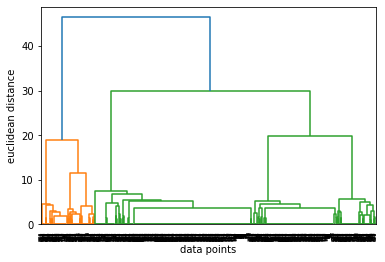

In [42]:
#The following linkage methods are used to compute the distance between two clusters 
# method='ward' uses the Ward variance minimization algorithm
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(data1, method = "ward")
#Plot the hierarchical clustering as a dendrogram.
#leaf_rotation : double, optional Specifies the angle (in degrees) to rotate the leaf labels.

dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

5. Apply Agglomerative Clustering using number of clusters.

In [43]:
from sklearn.cluster import AgglomerativeClustering

In [44]:
hc = AgglomerativeClustering(n_clusters = 6, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(df_h)

6. Create label column for predicted cluster label.

In [45]:
df_h["label"] = cluster

In [46]:
df_h.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,label
0,1,1,1,0,1,0,0,0,1,0,0,0,2
1,1,0,1,0,1,0,0,0,1,0,0,0,1
2,1,0,1,0,1,0,0,0,1,0,0,0,1
3,1,0,1,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,1,1,0,0,0,0,0


7. Show label counts.

In [48]:
df_h['label'].value_counts()

1    412
5    191
4     91
0     72
3     63
2     60
Name: label, dtype: int64

8. Show a silhouette score.

In [49]:
from sklearn.metrics import silhouette_score

In [50]:
score_agg = silhouette_score(df_h, cluster)
score_agg

0.6832654795236572